## Notebook description

Paper figure 3 - air-sea flux

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script> so much code! click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import numpy as np
# import xarray as xr
import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
# from scipy.io import loadmat
from cmocean import cm
import glob
import pandas as pd
import warnings
import pickle
import arrow
#from cartopy import crs, feature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools
import netCDF4 as nc

#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

In [4]:
#to g m2 yr
cf = 12.0107e-3 * 365

data = pd.read_csv('../pkls/Evans_seaair_numbers.csv')
data = (-1)*data

NS_W_mean = (cf)*data['NSTRAIT_4'][0]; NS_W_std = (cf)*data['NSTRAIT_4'][1] ;
NS_W_min = (cf)*data['NSTRAIT_4'][2]; NS_W_max = (cf)*data['NSTRAIT_4'][3] ; 
NS_S_mean = (cf)*data['NSTRAIT_4'][4]; NS_S_std = (cf)*data['NSTRAIT_4'][5] ;
NS_S_min = (cf)*data['NSTRAIT_4'][6]; NS_S_max = (cf)*data['NSTRAIT_4'][7] ;
NS_A_mean = (cf)*data['NSTRAIT_4'][8]; NS_A_std = (cf)*data['NSTRAIT_4'][9] ;
NS_A_min = (cf)*data['NSTRAIT_4'][10]; NS_A_max = (cf)*data['NSTRAIT_4'][11] ;

CS_W_mean = (cf)*data['CSTRAIT_5'][0]; CS_W_std = (cf)*data['CSTRAIT_5'][1] ;
CS_W_min = (cf)*data['CSTRAIT_5'][2]; CS_W_max = (cf)*data['CSTRAIT_5'][3] ; 
CS_S_mean = (cf)*data['CSTRAIT_5'][4]; CS_S_std = (cf)*data['CSTRAIT_5'][5] ;
CS_S_min = (cf)*data['CSTRAIT_5'][6]; CS_S_max = (cf)*data['CSTRAIT_5'][7] ;
CS_A_mean = (cf)*data['CSTRAIT_5'][8]; CS_A_std = (cf)*data['CSTRAIT_5'][9] ;
CS_A_min = (cf)*data['CSTRAIT_5'][10]; CS_A_max = (cf)*data['CSTRAIT_5'][11] ;

JDF_W_mean = (cf)*data['JDF_6'][0]; JDF_W_std = (cf)*data['JDF_6'][1] ;
JDF_W_min = (cf)*data['JDF_6'][2]; JDF_W_max = (cf)*data['JDF_6'][3] ; 
JDF_S_mean = (cf)*data['JDF_6'][4]; JDF_S_std = (cf)*data['JDF_6'][5] ;
JDF_S_min = (cf)*data['JDF_6'][6]; JDF_S_max = (cf)*data['JDF_6'][7] ;
JDF_A_mean = (cf)*data['JDF_6'][8]; JDF_A_std = (cf)*data['JDF_6'][9] ;
JDF_A_min = (cf)*data['JDF_6'][10]; JDF_A_max = (cf)*data['JDF_6'][11] ;

#winter as January 1 to March 31, spring as April 1 to
#June 30, summer as July 1 to September 30, and autumn as October
#only calculating for JDF and CS , NS has no Winter data, which would be disingenuous
#1 to December 31.
D_SUM = 90
D_WINT = 90
D_AUT = 91

#calculating summer, winter, and autumn mean, with the assumption that a spring mean flux is 0 
JDF_ANN_MEAN = (D_SUM/365)*JDF_S_mean + (D_WINT/365)*JDF_W_mean + (D_AUT/365) * JDF_A_mean
CS_ANN_MEAN = (D_SUM/365)*CS_S_mean + (D_WINT/365)*CS_W_mean + (D_AUT/365) * CS_A_mean


# Evans_Mathis_2013 = 18

In [8]:
data

,measurement_mmol_m2_day,NSTRAIT_4,CSTRAIT_5,JDF_6,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,,-999.0,-5.5,-0.4,NaN,NaN,NaN
1,,-999.0,-9.7,-0.5,NaN,NaN,NaN
2,,-999.0,9.7,-0.0,NaN,NaN,NaN
3,,-999.0,-48.5,-4.1,NaN,NaN,NaN
4,,-15.6,17.5,-2.0,NaN,NaN,NaN
5,,-5.9,-10.4,-1.1,NaN,NaN,NaN
6,,-2.5,31.8,-0.0,NaN,NaN,NaN
7,,-28.8,-37.0,-4.9,NaN,NaN,NaN
8,,-7.1,-10.0,-28.4,NaN,NaN,NaN
9,,-13.1,-6.4,-41.1,NaN,NaN,NaN


In [15]:
# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_summer1 = np.zeros([dayslen,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%20 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
# #     print(tn['co2_flux_mmol_m2_s'])
#     t_dic = tn['co2_flux_mmol_m2_s'][0,:,:]
#     #mask out edges
# #     t_dic[878:898,:] = np.nan
# #     t_dic[:,0:20] = np.nan
#     BR_oma_summer1[i,:,:] = t_dic


# print(np.shape(BR_oma_summer1))
# #BR_oma_summer_mean = np.nanmean(BR_oma_summer1,axis=0)
# pickle.dump(BR_oma_summer1, open("./pkls/BR3_flx.pkl", 'wb'))

In [16]:
# BR_oma_summer1 = np.zeros([dayslen,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%20 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/PI5/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
# #     print(tn['co2_flux_mmol_m2_s'])
#     t_dic = tn['co2_flux_mmol_m2_s'][0,:,:]
# #     t_dic[878:898,:] = np.nan
# #     t_dic[:,0:20] = np.nan
#     BR_oma_summer1[i,:,:] = t_dic


# print(np.shape(BR_oma_summer1))
# pickle.dump(BR_oma_summer1, open("./PI5_flx.pkl", 'wb'))

In [17]:
# BR_oma_summer1 = np.zeros([dayslen,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%20 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/PI9/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
# #     print(tn['co2_flux_mmol_m2_s'])
#     t_dic = tn['co2_flux_mmol_m2_s'][0,:,:]
# #     t_dic[878:898,:] = np.nan
# #     t_dic[:,0:20] = np.nan
#     BR_oma_summer1[i,:,:] = t_dic


# print(np.shape(BR_oma_summer1))
# pickle.dump(BR_oma_summer1, open("./pkls/PI9_flx.pkl", 'wb'))

## Load flux calculations and convert from mmol/m2/s to mmol/day and g/yr

In [18]:
# grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# vdir = grid['e2t'][0,0:878,20:398]
# udir = grid['e1t'][0,0:878,20:398]
# wdir = grid['e3t_0'][0,:,0:878,20:398]
# wdir_20 = grid['e3t_0'][0,0:20,0:878,20:398]
# wdir_20_100 = grid['e3t_0'][0,20:27,0:878,20:398]
# wdir_deep = grid['e3t_0'][0,27:40,0:878,20:398]

grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
vdir = grid['e2t'][0,:]
udir = grid['e1t'][0,:]
surfa = vdir*udir
print(np.shape(surfa))

(898, 398)


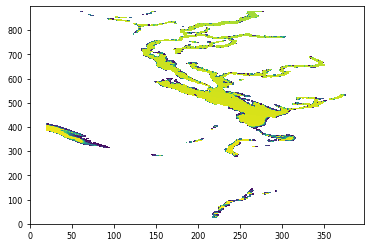

In [57]:
import pickle
csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))

plt.pcolormesh(csize[30,:,:])

(365, 898, 398)


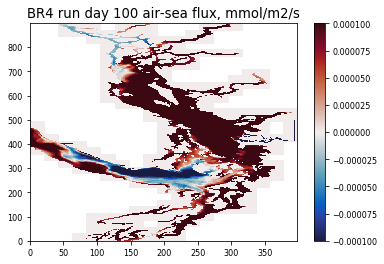

In [52]:
BR_flx = pickle.load(open('./pkls/BR3_flx.pkl', 'rb')) * 1.11 #asselin filter
BR_flx[BR_flx>1e5]=np.nan
print(np.shape(BR_flx))

w = plt.pcolormesh(BR_flx[100,:,:], cmap = cm.balance, vmin = -1e-4, vmax = 1e-4)
plt.title('BR3 run day 100 air-sea flux, mmol/m2/s')
plt.colorbar(w)

In [20]:
BR_flx = pickle.load(open('./pkls/BR3_flx.pkl', 'rb')) * 1.11 #asselin filter
BR_flx[BR_flx>1e5]=np.nan
BR_flx[BR_flx==0]=np.nan
print(np.shape(BR_flx))

#mmol/m2/s > mmol/m2/day
BR_flx_mmol_m2_day = BR_flx * 86400
print(np.shape(BR_flx_mmol_m2_day))
BR_daily_mean_mmol_m2_day = np.zeros(365)

for i in range(0,365):
    print(i)
    masked_data = np.ma.masked_array(BR_flx_mmol_m2_day[i,:,:], np.isnan(BR_flx_mmol_m2_day[i,:,:]))
    weights = surfa
    average = np.ma.average(masked_data, weights=weights)
    print(np.shape(average))
    BR_daily_mean_mmol_m2_day[i] = average

BR_flx_mmol_m2_yr = np.sum(BR_flx_mmol_m2_day, axis = 0)
BR_flx_gC_m2_yr = BR_flx_mmol_m2_yr*12.0107*1e-3
BR_flx_gC_m2_yr[BR_flx_gC_m2_yr>1e6]=np.nan
BR_flx_gC_m2_yr[BR_flx_gC_m2_yr==0]=np.nan

# weights = surfa
# average = np.ma.average(BR_flx_gC_m2_yr, axis=1, weights=weights)
# print(average)

PI_flx = pickle.load(open('./PI9_flx.pkl', 'rb')) * 1.11 #asselin filter
PI_flx[PI_flx>1e5]=np.nan
print(np.shape(PI_flx))

#mmol/m2/s > mmol/m2/day
PI_flx_mmol_m2_day = PI_flx * 86400
print(np.shape(PI_flx_mmol_m2_day))
PI_daily_mean_mmol_m2_day = np.zeros(365)

for i in range(0,365):
    
    masked_data = np.ma.masked_array(PI_flx_mmol_m2_day[i,:,:], np.isnan(PI_flx_mmol_m2_day[i,:,:]))
    weights = surfa
    average = np.ma.average(masked_data, weights=weights)
    PI_daily_mean_mmol_m2_day[i] = average
    
PI_flx_mmol_m2_yr = np.sum(PI_flx_mmol_m2_day, axis = 0)
PI_flx_gC_m2_yr = PI_flx_mmol_m2_yr*12.0107*1e-3
PI_flx_gC_m2_yr[PI_flx_gC_m2_yr>1e6]=np.nan
PI_flx_gC_m2_yr[PI_flx_gC_m2_yr==0]=np.nan
# print('mean PI flux g/m2/yr')
# weights = surfa
# average = np.ma.average(PI_flx_gC_m2_yr, weights=weights)
# print(average)


(365, 898, 398)
(365, 898, 398)
0
()
1
()
2
()
3
()
4
()
5
()
6
()
7
()
8
()
9
()
10
()
11
()
12
()
13
()
14
()
15
()
16
()
17
()
18
()
19
()
20
()
21
()
22
()
23
()
24
()
25
()
26
()
27
()
28
()
29
()
30
()
31
()
32
()
33
()
34
()
35
()
36
()
37
()
38
()
39
()
40
()
41
()
42
()
43
()
44
()
45
()
46
()
47
()
48
()
49
()
50
()
51
()
52
()
53
()
54
()
55
()
56
()
57
()
58
()
59
()
60
()
61
()
62
()
63
()
64
()
65
()
66
()
67
()
68
()
69
()
70
()
71
()
72
()
73
()
74
()
75
()
76
()
77
()
78
()
79
()
80
()
81
()
82
()
83
()
84
()
85
()
86
()
87
()
88
()
89
()
90
()
91
()
92
()
93
()
94
()
95
()
96
()
97
()
98
()
99
()
100
()
101
()
102
()
103
()
104
()
105
()
106
()
107
()
108
()
109
()
110
()
111
()
112
()
113
()
114
()
115
()
116
()
117
()
118
()
119
()
120
()
121
()
122
()
123
()
124
()
125
()
126
()
127
()
128
()
129
()
130
()
131
()
132
()
133
()
134
()
135
()
136
()
137
()
138
()
139
()
140
()
141
()
142
()
143
()
144
()
145
()
146
()
147
()
148
()
149
()
150
()
151
()
152
()
153
()


In [21]:
print('mean PI flux g/m2/yr')
masked_data = np.ma.masked_array(PI_flx_gC_m2_yr, np.isnan(PI_flx_gC_m2_yr))
weights = surfa
average = np.ma.average(masked_data, weights=weights)
print(average)
print('mean BR flux g/m2/yr')
masked_data = np.ma.masked_array(BR_flx_gC_m2_yr, np.isnan(BR_flx_gC_m2_yr))
weights = surfa
average = np.ma.average(masked_data, weights=weights)
print(average)


mean PI flux g/m2/yr
-12.564458589169996
mean BR flux g/m2/yr
-8.256741044085494


In [22]:
# PI_daily_mean_mmol_m2_day

In [23]:
tsal = pickle.load(open('../pkls/BR3_sal_summer_mean.pkl', 'rb'))
print(np.shape(tsal))
surfsal = tsal[0,:,:]
print(np.size(tsal == 0))
lmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
tmask = (lmask['tmask'][0,0,:,:])
w = np.where((surfsal < 2) & (tmask == 1))

print(np.size(w))
print(np.average(BR_flx_gC_m2_yr[w], weights = surfa[w]))

(40, 898, 398)
14296160
1818
-62.32773056445837


## calculate mean pco2 for PI5 run and BR3 run

In [24]:
# for i in range(0,898):
#     for j in range(0,398):
#         if np.ma.is_masked(tbath[i,j]):
#             w[i,j] = np.nan

            
start ='2015-01-01'
end ='2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array1 = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array1.append(r)
dayslen = len(arrow_array1)

pco2_daily_mean_BR3 = np.zeros(dayslen)
pco2_daily_mean_PI9 = np.zeros(dayslen)
wind_daily_mean = np.zeros(dayslen)

for i in range(0,dayslen):

    tdate = arrow_array1[i][0]
    ymd = tdate.format('YYYYMMDD')

    if i%100 == 0:
        print(ymd)
    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_'+ymd+'.nc')
    pco2 = t_pco2['model_output']['pCO2'][:]
    pco2[pco2>1e4]= np.nan
    masked_data = np.ma.masked_array(pco2, np.isnan(pco2))
    weights = surfa
    average = np.ma.average(masked_data, weights=weights)
    pco2_daily_mean_BR3[i] = average

    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI9_OmA_plus_'+ymd+'.nc')
    pco2 = t_pco2['model_output']['pCO2'][:]
    pco2[pco2>1e4]= np.nan
    masked_data = np.ma.masked_array(pco2, np.isnan(pco2))
    weights = surfa
    average = np.ma.average(masked_data, weights=weights)
    pco2_daily_mean_PI9[i] = average
    #wind
    t_wind = nc.Dataset('//data/tjarniko/results/hindcast.201905_windmag_interp/windmag_interp_1d_'+ymd+'.nc')
    wind = t_wind['model_output']['wind_mag'][:]
    wind[wind>1e4]= np.nan
    masked_data = np.ma.masked_array(wind, np.isnan(wind))
    weights = surfa
    average = np.ma.average(masked_data, weights=weights)
    wind_daily_mean[i] = average
    
#     wind_daily_mean[i] = np.nanmean(wind)
    
#     masked_data = np.ma.masked_array(pco2, np.isnan(pco2))
#     weights = surfa
#     average = np.ma.average(masked_data, weights=weights)
#     pco2_daily_mean_PI9[i] = average

20150101
20150411
20150720
20151028


#### get mean over-water windspeed squared

In [25]:
print(surfa)

[[185243.16065032 190803.27747661 194671.95335081 ... 231244.7650926
  231250.57782804 231256.38616842]
 [185143.22065913 190700.12381496 194576.64831066 ... 231218.44692684
  231224.25621104 231230.06109609]
 [192573.97235167 194186.67154445 196368.25566354 ... 231178.55957774
  231184.36291238 231190.16184242]
 ...
 [234534.93463225 234471.10689115 234011.83013385 ... 178285.33125841
  177754.66344186 177255.24489697]
 [236196.92164773 236103.23266655 235423.37323571 ... 177713.53480049
  177057.4920366  176408.64494444]
 [238326.73957072 238154.91585215 237066.18933351 ... 177165.37586233
  176356.42614012 175503.8701075 ]]


In [26]:
#brute force mask for wsquared
bathy = nc.Dataset('/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
landmask = (np.where(np.ma.is_masked(bathy['Bathymetry'][:])))
tbath = bathy['Bathymetry'][:]
w = np.zeros([898,398])


for i in range(0,898):
    for j in range(0,398):
        if np.ma.is_masked(tbath[i,j]):
            w[i,j] = np.nan

#calculate square of windspeed
start ='2015-01-01'
end ='2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array1 = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array1.append(r)
dayslen = len(arrow_array1)

wind_daily_mean_squared = np.zeros(dayslen)

for i in range(0,dayslen):

    tdate = arrow_array1[i][0]
    ymd = tdate.format('YYYYMMDD')

    if i%100 == 0:
        print(ymd)

    #wind
    t_wind = nc.Dataset('//data/tjarniko/results/hindcast.201905_windmag_interp/windmag_interp_1d_'+ymd+'.nc')
    wind = t_wind['model_output']['wind_mag'][:]
#     print(np.nanmin(wind))
#     print(np.nanmax(wind))
    windsqrd = wind**2
    windsqrd[np.isnan(w)] = np.nan 
    windsqrd[windsqrd==0] = np.nan
    print(np.nanmax(windsqrd))
    masked_data = np.ma.masked_array(windsqrd, np.isnan(windsqrd))
    surfa[np.isnan(w)] = 0
    weights = surfa
    
    print(np.nanmean(windsqrd))
    print((np.average(masked_data, weights = surfa)))
    print(np.nanmean(masked_data))
    print()
    wind_daily_mean_squared[i] = (np.average(masked_data, weights = surfa))

#     wind[wind>1e4]= np.nan
#     masked_data = np.ma.masked_array(wind, np.isnan(wind))
#     weights = surfa
#     average = np.ma.average(masked_data, weights=weights)
#     wind_daily_mean[i] = average
    

20150101
31.696274
6.2009106
6.253204561204217
6.2009106

22.6363
6.6108074
6.679897873647759
6.6108074

39.088867
7.4385443
7.5192606997927935
7.4385443

166.3424
46.933456
46.76091563389361
46.933456

104.881
23.767487
24.041227455054205
23.767487

51.31492
13.289891
13.226558695294706
13.289891

55.141804
7.2792335
7.367504377284312
7.2792335

126.59947
16.740604
17.01213216839804
16.740604

68.25166
9.634689
9.792126875968576
9.634689

30.594816
5.9332457
5.987228911199734
5.9332457

32.831364
4.486845
4.55266981149803
4.486845

36.884872
5.716958
5.789580698875222
5.716958

47.85366
5.5597544
5.6532233902306395
5.5597544

106.56494
11.504847
11.716752504281258
11.504847

150.80109
41.868435
41.7568671201238
41.868435

131.04863
50.04898
50.231380513018394
50.04898

74.21776
26.063652
26.097254710187936
26.063652

170.3659
54.233223
54.7599039646327
54.233223

43.824696
14.828031
14.973600166456704
14.828031

18.865906
5.4671855
5.540264336988545
5.4671855

74.78518
10.566089
10.66

In [27]:
wind_daily_mean_squared

array([ 6.25320456,  6.67989787,  7.5192607 , 46.76091563, 24.04122746,
       13.2265587 ,  7.36750438, 17.01213217,  9.79212688,  5.98722891,
        4.55266981,  5.7895807 ,  5.65322339, 11.7167525 , 41.75686712,
       50.23138051, 26.09725471, 54.75990396, 14.97360017,  5.54026434,
       10.66824825, 18.9362181 , 37.4069451 , 19.38814062, 14.14711819,
        8.90089851, 13.70991797,  9.07360257,  9.73008619,  5.72317985,
        9.22128865, 17.15976902, 22.31740128,  9.13623409,  6.9789809 ,
       45.86106754, 55.58822678, 33.28072249, 30.93987177, 14.54121577,
        7.89356984, 11.42676739, 11.00205072, 10.36452882, 18.86271617,
       15.49587748, 18.86513839, 16.31269071,  8.50787583,  7.16227678,
       13.61396265, 20.80068998, 11.51688753,  4.87442575,  5.64028738,
        4.66255607,  4.77482763, 22.65379697, 37.01213364,  4.76560163,
       29.94505732, 21.50115245,  2.71187015,  2.90456187,  5.53882234,
        7.39577539,  7.61499781,  5.11694547,  8.34201416, 25.08

#### extract the atmospheric seasonal cycle for BR and PI

In [28]:
start ='2015-01-01'
end ='2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

dayslen = len(arrow_array)
atcco2_array = np.zeros(dayslen)
dec_time_array = np.zeros(dayslen)


#constants from SKOG for BR run

LR_slope   =  2.149     #  linear regression + gaussian fit
LR_int     =  -3929.359 #  to seasonal cycle of atmospheric co2
ctr        =  161.898   #  based on scripps observations at ptbarrow and lajolla
amp        =  7.083     #  calc notebook by TJSJ
wid        =  44.703    #  notebook loc:
ctr2       =  218.832   #  carbon_dev/MOCSY_and_FLUX/CO2_obs.ipynb
amp2       =  -19.004   #
wid2       =  87.8836   #
ctr3       =  199.430   #
amp3       =  8.026     #
wid3       =  -185.920  #

zz_LRslop = LR_slope
zz_LRint = LR_int
zz_ctr = ctr
zz_ctr2 = ctr2
zz_ctr3 = ctr3
zz_wid = wid
zz_wid2 = wid2
zz_wid3 = wid3
zz_amp = amp
zz_amp2 = amp2
zz_amp3 = amp3

for i in range(0,len(arrow_array)):

    tdate = arrow_array[i][0]
    ymd = tdate.format('YYYYMMDD')
    doy = tdate.format('DDDD')
    yr = tdate.format('YYYY')
    
    zz_year = int(yr)
    zz_day = int(doy)

    zz_yearcyc =  zz_amp * np.exp( -((zz_day - zz_ctr)/zz_wid)**2)\
      + zz_amp2 * np.exp( -((zz_day - zz_ctr2)/zz_wid2)**2)\
      + zz_amp3 * np.exp( -((zz_day - zz_ctr3)/zz_wid3)**2)

    zz_atcco2 = (zz_year+(zz_day/365))*zz_LRslop+zz_LRint + zz_yearcyc
    atcco2_array[i] = zz_atcco2
    dec_time_array[i] = zz_year+(zz_day/365)

LR_slope   =  0     #!  linear regression + gaussian fit
LR_int     =  280 #!  to seasonal cycle of atmospheric co2
ctr        =  161.898  # !  based on scripps observations at ptbarrow and lajolla
amp        =  7.083  # !  calc notebook by TJSJ
wid        =  44.703  #  !  notebook loc:
ctr2       =  218.832  # !  carbon_dev/MOCSY_and_FLUX/CO2_obs.ipynb
amp2       =  -19.004   #!
wid2       =  87.8836   #!
ctr3       =  199.430   #!
amp3       =  8.026     #!
wid3       =  -185.920  #!
    

zz_LRslop = LR_slope
zz_LRint = LR_int
zz_ctr = ctr
zz_ctr2 = ctr2
zz_ctr3 = ctr3
zz_wid = wid
zz_wid2 = wid2
zz_wid3 = wid3
zz_amp = amp
zz_amp2 = amp2
zz_amp3 = amp3

atcco2_array_PI = np.zeros(365)

for i in range(0,len(arrow_array)):

    tdate = arrow_array[i][0]
    ymd = tdate.format('YYYYMMDD')
    doy = tdate.format('DDDD')
    yr = tdate.format('YYYY')
    
    zz_year = int(yr)
    zz_day = int(doy)

    zz_yearcyc =  zz_amp * np.exp( -((zz_day - zz_ctr)/zz_wid)**2)\
      + zz_amp2 * np.exp( -((zz_day - zz_ctr2)/zz_wid2)**2)\
      + zz_amp3 * np.exp( -((zz_day - zz_ctr3)/zz_wid3)**2)

    zz_atcco2 = (zz_year+(zz_day/365))*zz_LRslop+zz_LRint + zz_yearcyc
    atcco2_array_PI[i] = zz_atcco2
    dec_time_array[i] = zz_year+(zz_day/365)



In [29]:
# fact = 0.52
# fig = plt.figure(figsize=(20*fact,10*fact))
# ax1 = fig.add_subplot(1,2,1)
# ax1.plot(dec_time_array,atcco2_array, 'r-')
# ax1.plot(dec_time_array,pco2_daily_mean_BR3, 'r:')
# ax1.plot(dec_time_array,atcco2_array_PI, 'b-')
# ax1.plot(dec_time_array,pco2_daily_mean_PI9, 'b:')
# ax1.set_title('Seasonal cycle for atmospheric co2 \n and mean surface pco2 \n (red = BR, blue = PI)')
# ax1.set_ylabel('uatm pco2')

# diseq_BR3 = np.abs(atcco2_array-pco2_daily_mean_BR3)
# diseq_PI5 = np.abs(atcco2_array_PI-pco2_daily_mean_PI9)
# ax1 = fig.add_subplot(1,2,2)
# ax1.plot(dec_time_array,diseq_BR3, 'r-')
# ax1.plot(dec_time_array,diseq_PI9, 'b-')

# ax1.set_title('Absolute value of air-sea disequilibrium \n (red = BR, blue = PI)')
# ax1.set_ylabel('uatm pco2')

#### PLOT A: AIR-SEA FLUX TIMESERIES

In [30]:
def plot_a(ax, fs):
    days = np.arange(1,366,1)
    ax.plot(days,BR_daily_mean_mmol_m2_day,color = 'red',label = 'present-day run')
    #ax1.plot(days,LA_daily_mean_mmol_m2_day,color = 'slategrey',label = 'LA run')
    ax.plot(days,PI_daily_mean_mmol_m2_day,color = 'cornflowerblue',label = 'preindustrial run')
    ax.set_xlabel('day of year',fontsize = fs)
    ax.set_ylabel('mmol m$^{-2}$ day$^{-1}$', fontsize = fs)
    ax.set_title(r'$\bf{c)}$ Air-Sea CO${_2}$ flux',fontsize = 8)
    ax.grid()
    ax.legend(loc = 'lower center', fontsize = fs)
    ax.axhline(y=0, color = 'k')
    #ax.text(0.03, 0.03, 'c)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
    ax.set_ylim(-25.01,9.01)
    
    #conv factor mmol/m2/day to g/m2/yr
    cf = 12.0107e-3 * 365
    axb =ax.twinx()
    axb.set_ylim(-25.01*cf,9.01*cf)
    axb.set_ylabel('g m$^{-2}$ yr$^{-1}$', fontsize = fs)
    ax.set_xlim(0,365)
    axb.set_xlim(0,365)
    
# fig = plt.figure(figsize=(17.5*fact, 10.5*fact))
# ax1 = plt.subplot2grid((1,3), (0,0), colspan=3, rowspan=1) # topleft

#plot_a(ax1,12)

#### PLOT B: WIND SPEED SQUARED AND DISEQUILIBRIUM

In [31]:
def plot_b(ax, fs):
    lw = 2.5
    alph = 0.15
    days = np.arange(1,366,1)
    #windspeed
    ax.plot(days,wind_daily_mean_squared,'-k', alpha = alph, label = 'wind speed')
    ax.fill_between(days, np.zeros_like(wind_daily_mean_squared), (wind_daily_mean_squared), \
                 color = 'k', alpha = alph )
    ax.set_ylim([0,100])
    ax.set_xlim([0,365])
    ax.set_ylabel('wind speed squared (m$^2$ s$^{-2}$)', fontsize = fs)
    axb =ax.twinx()
    axb.plot(days,pco2_daily_mean_BR3,'-r', linewidth = lw, label = 'seawater pCO$_2$ (present-day)')
    axb.plot(days,atcco2_array,color = 'r', linewidth = lw, linestyle = '--', label = 'atmospheric pCO$_2$ (present-day)' )

    axb.plot(days,pco2_daily_mean_PI9, color = 'cornflowerblue', linewidth = lw, linestyle = '-', label = 'seawater pCO$_2$ (preindustrial)')
    axb.plot(days,atcco2_array_PI,color = 'cornflowerblue', linestyle = '--', linewidth = lw, label = 'atmospheric pCO$_2$ (preindustrial)' )

    axb.legend(loc = 'best')
    axb.set_ylabel('pCO$_2#$ ($\mu$atm)', fontsize = fs)
    ax.set_xlabel('day of year', fontsize = fs)
    
    # axb.axhline(y=409, color = 'r', linestyle = ':')

    axb.set_xlim([0,365])
    #ax.text(0.03, 0.03, 'd)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='bottom')
    ax.legend(loc = 'best')
    #ax.grid()
    
# fig = plt.figure(figsize=(17.5*fact, 10.5*fact))
# ax1 = plt.subplot2grid((1,3), (0,0), colspan=3, rowspan=1) # topleft
# ax1.set_title()
#plot_b(ax1,12)

#### PLOT C-E: Maps! (no function here, eventually a colorbar will have to be shared, which is 100% a project for mr. illustrator.

Text(0.03, 0.03, 'e)')

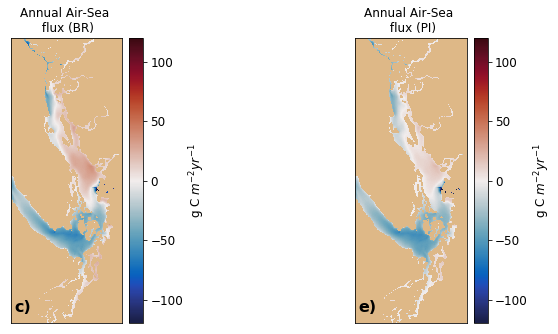

In [32]:
fs = 12
fact = 0.5
fig = plt.figure(figsize=(17.5*fact, 10.5*fact)) 

ax3 = plt.subplot2grid((1,3), (0,0), colspan=1,rowspan = 2)
tplt = BR_flx_gC_m2_yr
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.balance, vmin=-120, vmax=120)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'burlywood')
ax3.set_title('Annual Air-Sea \n flux (BR)', fontsize = fs)
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label('g C $m^{-2}$$yr^{-1}$', fontsize = fs)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')



ax5 = plt.subplot2grid((1,3), (0,2), colspan=1,rowspan = 2)
tplt = PI_flx_gC_m2_yr
viz_tools.set_aspect(ax5)
mesh = ax5.pcolormesh(tplt, cmap=cm.balance, vmin=-120, vmax=120)
viz_tools.plot_land_mask(ax5, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'burlywood')
ax5.set_title('Annual Air-Sea \n flux (PI)', fontsize = fs)
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label('g C $m^{-2}$$yr^{-1}$', fontsize = fs)
ax5.text(0.03, 0.03, 'e)', transform=ax5.transAxes, fontsize=16, fontweight='bold', va='bottom')




#### LOAD EVANS OBS. DATASET, CONVERT FROM MMOL/M2/DAY TO G/M2/YR

##### calculating annual mean - assumption that air-sea flux in spring is 0 

In [33]:
#to g m2 yr
cf = 12.0107e-3 * 365

data = pd.read_csv('../pkls/Evans_seaair_numbers.csv')
data = (-1)*data

NS_W_mean = (cf)*data['NSTRAIT_4'][0]; NS_W_std = (cf)*data['NSTRAIT_4'][1] ;
NS_W_min = (cf)*data['NSTRAIT_4'][2]; NS_W_max = (cf)*data['NSTRAIT_4'][3] ; 
NS_S_mean = (cf)*data['NSTRAIT_4'][4]; NS_S_std = (cf)*data['NSTRAIT_4'][5] ;
NS_S_min = (cf)*data['NSTRAIT_4'][6]; NS_S_max = (cf)*data['NSTRAIT_4'][7] ;
NS_A_mean = (cf)*data['NSTRAIT_4'][8]; NS_A_std = (cf)*data['NSTRAIT_4'][9] ;
NS_A_min = (cf)*data['NSTRAIT_4'][10]; NS_A_max = (cf)*data['NSTRAIT_4'][11] ;

CS_W_mean = (cf)*data['CSTRAIT_5'][0]; CS_W_std = (cf)*data['CSTRAIT_5'][1] ;
CS_W_min = (cf)*data['CSTRAIT_5'][2]; CS_W_max = (cf)*data['CSTRAIT_5'][3] ; 
CS_S_mean = (cf)*data['CSTRAIT_5'][4]; CS_S_std = (cf)*data['CSTRAIT_5'][5] ;
CS_S_min = (cf)*data['CSTRAIT_5'][6]; CS_S_max = (cf)*data['CSTRAIT_5'][7] ;
CS_A_mean = (cf)*data['CSTRAIT_5'][8]; CS_A_std = (cf)*data['CSTRAIT_5'][9] ;
CS_A_min = (cf)*data['CSTRAIT_5'][10]; CS_A_max = (cf)*data['CSTRAIT_5'][11] ;

JDF_W_mean = (cf)*data['JDF_6'][0]; JDF_W_std = (cf)*data['JDF_6'][1] ;
JDF_W_min = (cf)*data['JDF_6'][2]; JDF_W_max = (cf)*data['JDF_6'][3] ; 
JDF_S_mean = (cf)*data['JDF_6'][4]; JDF_S_std = (cf)*data['JDF_6'][5] ;
JDF_S_min = (cf)*data['JDF_6'][6]; JDF_S_max = (cf)*data['JDF_6'][7] ;
JDF_A_mean = (cf)*data['JDF_6'][8]; JDF_A_std = (cf)*data['JDF_6'][9] ;
JDF_A_min = (cf)*data['JDF_6'][10]; JDF_A_max = (cf)*data['JDF_6'][11] ;

#winter as January 1 to March 31, spring as April 1 to
#June 30, summer as July 1 to September 30, and autumn as October
#only calculating for JDF and CS , NS has no Winter data, which would be disingenuous
#1 to December 31.
D_SUM = 90
D_WINT = 90
D_AUT = 91

#calculating summer, winter, and autumn mean, with the assumption that a spring mean flux is 0 
JDF_ANN_MEAN = (D_SUM/365)*JDF_S_mean + (D_WINT/365)*JDF_W_mean + (D_AUT/365) * JDF_A_mean
CS_ANN_MEAN = (D_SUM/365)*CS_S_mean + (D_WINT/365)*CS_W_mean + (D_AUT/365) * CS_A_mean


# Evans_Mathis_2013 = 18

In [7]:
data

,measurement_mmol_m2_day,NSTRAIT_4,CSTRAIT_5,JDF_6,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,,-999.0,-5.5,-0.4,NaN,NaN,NaN
1,,-999.0,-9.7,-0.5,NaN,NaN,NaN
2,,-999.0,9.7,-0.0,NaN,NaN,NaN
3,,-999.0,-48.5,-4.1,NaN,NaN,NaN
4,,-15.6,17.5,-2.0,NaN,NaN,NaN
5,,-5.9,-10.4,-1.1,NaN,NaN,NaN
6,,-2.5,31.8,-0.0,NaN,NaN,NaN
7,,-28.8,-37.0,-4.9,NaN,NaN,NaN
8,,-7.1,-10.0,-28.4,NaN,NaN,NaN
9,,-13.1,-6.4,-41.1,NaN,NaN,NaN


In [34]:
print(NS_S_mean)

-68.3889258


In [5]:
JDF_ANN_MEAN

-33.63476428

In [6]:
CS_ANN_MEAN

2.0418189999999967

#### CALCULATE HISTOGRAM OF BR AND PI

In [35]:
BR_nonan = BR_flx_gC_m2_yr[~np.isnan(BR_flx_gC_m2_yr)]
PI_nonan = PI_flx_gC_m2_yr[~np.isnan(PI_flx_gC_m2_yr)]

step = 5
t_start = -100
t_end = 40
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)

def manual_hist(test_hist):
    for i in range(0,len(bin_starts)):
        obs_in_bin = test_hist[((test_hist>=bin_starts[i]) &\
                               (test_hist<bin_ends[i]))]

        bin_prop[i] = np.size(obs_in_bin)/np.size(test_hist)
    return bin_prop

# bin_propLA = manual_hist(LA_nonan)
# t_LA = np.copy(bin_propLA)
bin_propBR = manual_hist(BR_nonan)
t_BR = np.copy(bin_propBR)
bin_propPI = manual_hist(PI_nonan)   
t_PI = np.copy(bin_propPI)

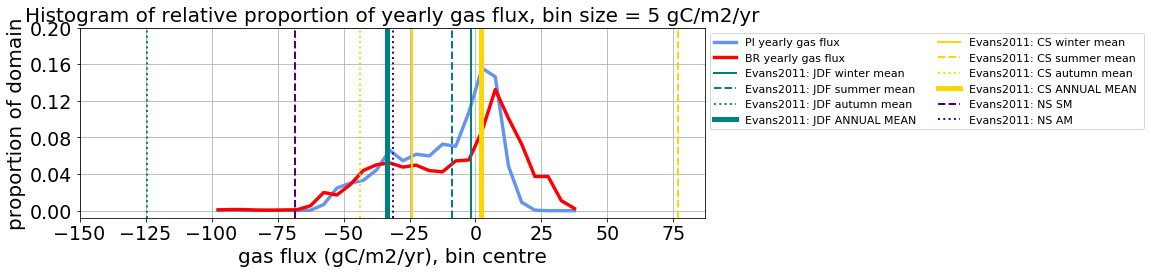

In [36]:
corfact = 1/(1 * (1/365) * (1 / 12.0107e-3))

fact = 0.7
fig = plt.figure(figsize=(16*fact,5*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)
#ax1.plot(bin_centres,t_LA, color = 'dimgrey', lw = 3.4, label = 'LA yearly gas flux')
ax1.plot(bin_centres,t_PI, color = 'cornflowerblue', lw = 3.4,label = 'PI yearly gas flux')
ax1.plot(bin_centres,t_BR, color = 'red', lw = 3.4,label = 'BR yearly gas flux')

ax1.axvline(JDF_W_mean, color = 'teal', lw = 2, label = 'Evans2011: JDF winter mean')
ax1.axvline(JDF_S_mean, color = 'teal', linestyle = '--' , lw = 2, label = 'Evans2011: JDF summer mean')
ax1.axvline(JDF_A_mean, color = 'teal', linestyle = ':', lw = 2, label = 'Evans2011: JDF autumn mean')
ax1.axvline(JDF_ANN_MEAN, color = 'teal', linestyle = '-', lw = 5, label = 'Evans2011: JDF ANNUAL MEAN')


ax1.axvline(CS_W_mean, color = 'gold', lw = 2, label = 'Evans2011: CS winter mean')
ax1.axvline(CS_S_mean, color = 'gold', linestyle = '--' , lw = 2, label = 'Evans2011: CS summer mean ')
ax1.axvline(CS_A_mean, color = 'gold', linestyle = ':', lw = 2, label = 'Evans2011: CS autumn mean')
ax1.axvline(CS_ANN_MEAN, color = 'gold', linestyle = '-', lw = 5, label = 'Evans2011: CS ANNUAL MEAN')

#ax1.axvline(NS_W_mean*corfact, color = 'indigo', lw = 2, label = 'NS winter mean')
ax1.axvline(NS_S_mean, color = 'indigo', linestyle = '--' , lw = 2, label = 'Evans2011: NS SM')
ax1.axvline(NS_A_mean, color = 'indigo', linestyle = ':', lw = 2, label = 'Evans2011: NS AM')

#
#ax1.axvline(88, color = 'lightsteelblue', lw = 2, label = 'Hales')
#ax1.axvline(-3.1, color = 'teal', lw = 2, label = '3)')
#ax1.axvline(7.9, color = 'crimson', lw = 2, label = '4)')
#ax1.axvline(26, color = 'lime', lw = 2, label = '1) BC coast')
#ax1.axvline(18, color = 'tan', lw = 2, label = 'Evans and Mathis 2013 Gulf of Alaska')

ax1.legend(bbox_to_anchor = [1,1],ncol=2)
ax1.set_title('Histogram of relative proportion of yearly gas flux, bin size = 5 gC/m2/yr', fontsize =20)

w = ax1.set_xticks(np.arange(-150, 100, step=25))
w = ax1.set_yticks(np.arange(0, 0.22, step=0.04))
ax1.set_xlabel('gas flux (gC/m2/yr), bin centre', fontsize =20 )
ax1.set_ylabel('proportion of domain', fontsize =20)
ax1.tick_params(axis='both', which='major', labelsize=19)
ax1.tick_params(axis='both', which='minor', labelsize=19)
ax1.grid()

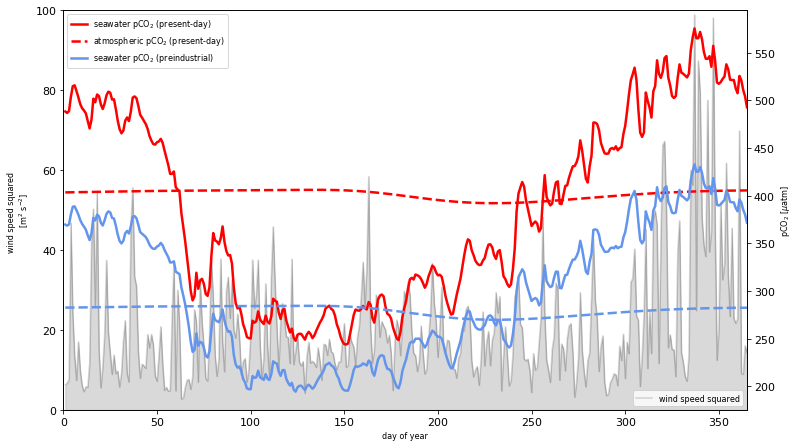

In [37]:
def plot_b(ax, fs):
    lw = 2.5
    alph = 0.15
    days = np.arange(1,366,1)
    #windspeed
    ax.plot(days,wind_daily_mean_squared,'-k', alpha = alph, label = 'wind speed squared')
    ax.fill_between(days, np.zeros_like(wind_daily_mean_squared), (wind_daily_mean_squared), \
                 color = 'k', alpha = alph )
    ax.set_ylim([0,100])
    ax.set_xlim([0,365])
    ax.set_ylabel('wind speed squared \n [m$^2$ s$^{-2}$]', fontsize = fs)
    axb =ax.twinx()
    axb.plot(days,pco2_daily_mean_BR3,'-r', linewidth = lw, label = 'seawater pCO$_2$ (present-day)')
    axb.plot(days,atcco2_array,color = 'r', linewidth = lw, linestyle = '--', label = 'atmospheric pCO$_2$ (present-day)' )

    axb.plot(days,pco2_daily_mean_PI9, color = 'cornflowerblue', linewidth = lw, linestyle = '-', label = 'seawater pCO$_2$ (preindustrial)' )
    axb.plot(days,atcco2_array_PI,color = 'cornflowerblue', linestyle = '--', linewidth = lw) 

    axb.legend(loc = 'best', fontsize = 8, ncol = 1)
    axb.set_ylabel('pCO$_2#$ [$\mu$atm]', fontsize = fs)
    ax.set_xlabel('day of year', fontsize = fs)
    
    # axb.axhline(y=409, color = 'r', linestyle = ':')

    axb.set_xlim([0,365])
    #ax.text(0.03, 0.03, 'd)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='bottom')
    ax.legend(loc = 'lower right', fontsize = 8)
    #ax.grid()
    
fig = plt.figure(figsize=(17.5*fact, 10.5*fact))
ax1 = plt.subplot2grid((1,3), (0,0), colspan=3, rowspan=1) # topleft
# ax1.set_title()
plot_b(ax1,8)

In [38]:
PI9_diseq = pco2_daily_mean_PI9-atcco2_array_PI
BR3_diseq = pco2_daily_mean_BR3-atcco2_array

PI9_wint_diseq = np.concatenate((PI9_diseq[0:60],PI9_diseq[335:365]),axis = 0)
BR3_wint_diseq = np.concatenate((BR3_diseq[0:60],BR3_diseq[335:365]),axis = 0)
print('winter diseq')
print(np.nanmean(PI9_wint_diseq))
print('summer diseq')
print(np.nanmean(BR3_wint_diseq))
PI9_sum_diseq = (PI9_diseq[150:240])
BR3_sum_diseq = (BR3_diseq[150:240])
print('PI9 summer diseq')
print(np.nanmean(PI9_sum_diseq))
print(np.nanmean(BR3_sum_diseq))

winter diseq
92.67775962814072
summer diseq
93.21382782347597
PI9 summer diseq
-35.86294207169762
-94.57267199996328


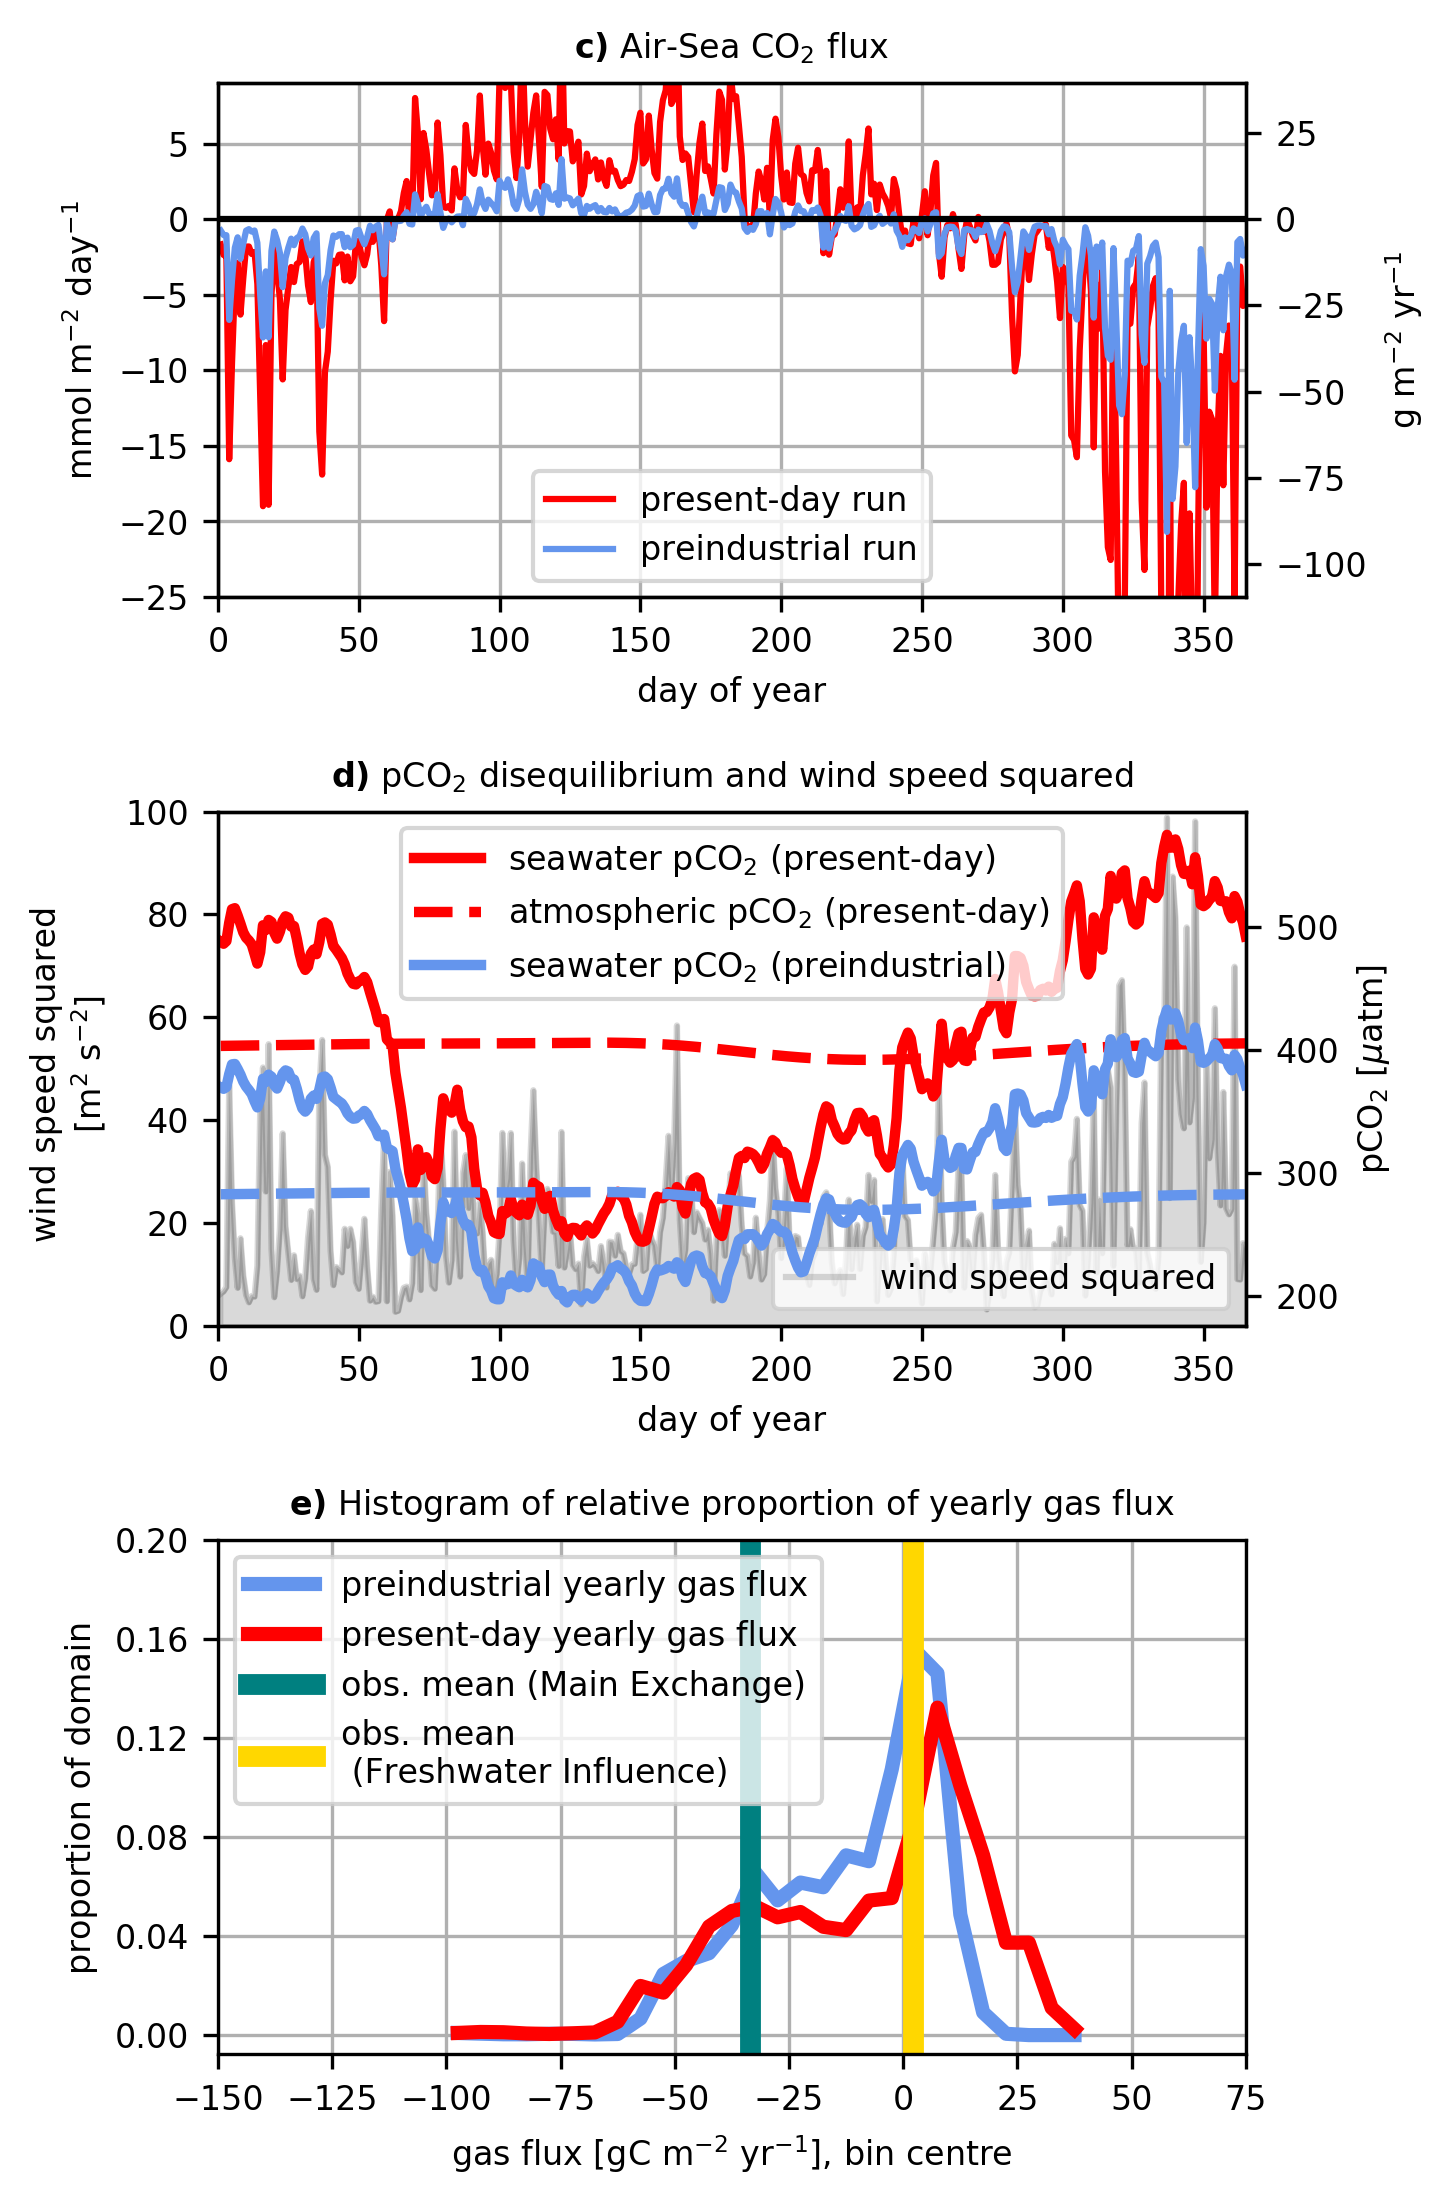

In [39]:
fact = 1/72 
fact = 0.72
fig = plt.figure(figsize=(23/2.54*.55, 19/2.54),dpi = 300)

# fact = 1/72 

# fig = plt.figure(figsize=(380, 538))

plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)


ax1 = plt.subplot2grid((3,1), (0,0), colspan=1, rowspan=1) # topleft
plot_a(ax1,8)
ax1 = plt.subplot2grid((3,1), (1,0), colspan=3, rowspan=1) # topleft
plot_b(ax1,8)
ax1.set_title(r'$\bf{d)}$ pCO${_2}$ disequilibrium and wind speed squared',fontsize = 8)
ax1 = plt.subplot2grid((3,1), (2,0), colspan=3, rowspan=1) # topleft
corfact = 1/(1 * (1/365) * (1 / 12.0107e-3))

lw = 2.5
#ax1.plot(bin_centres,t_LA, color = 'dimgrey', lw = 3.4, label = 'LA yearly gas flux')
ax1.plot(bin_centres,t_PI, color = 'cornflowerblue', lw = 3.4,label = 'preindustrial yearly gas flux')
ax1.plot(bin_centres,t_BR, color = 'red', lw = 3.4,label = 'present-day yearly gas flux')

ax1.axvline(JDF_ANN_MEAN, color = 'teal', linestyle = '-', lw = 5, label = 'obs. mean (Main Exchange)')

ax1.axvline(CS_ANN_MEAN, color = 'gold', linestyle = '-', lw = 5, label = 'obs. mean \n (Freshwater Influence)')

ax1.legend(loc = 'best', fontsize = 8)
w = ax1.set_xticks(np.arange(-150, 100, step=25))
w = ax1.set_yticks(np.arange(0, 0.22, step=0.04))
ax1.set_xlabel('gas flux [gC m$^{-2}$ yr$^{-1}$], bin centre', fontsize =8 )
ax1.set_ylabel('proportion of domain', fontsize =8)
ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.tick_params(axis='both', which='minor', labelsize=8)
ax1.grid()
ax1.set_title(r'$\bf{e)}$ Histogram of relative proportion of yearly gas flux',fontsize = 8)

#ax1.text(0.03, 0.03, 'e)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')

plt.tight_layout()
plt.savefig('Fig3_c-e.jpg')

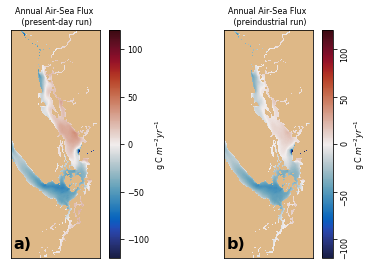

In [40]:
fs = 8
fact = 0.4
fig = plt.figure(figsize=(17.5*fact, 10.5*fact)) 

ax3 = plt.subplot2grid((1,2), (0,0), colspan=1,rowspan = 2)
tplt = BR_flx_gC_m2_yr
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.balance, vmin=-120, vmax=120)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'burlywood')
ax3.set_title('Annual Air-Sea Flux \n (present-day run)', fontsize = fs)
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label('g C $m^{-2}$$yr^{-1}$', fontsize = fs)
ax3.text(0.03, 0.03, 'a)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax5 = plt.subplot2grid((1,2), (0,1), colspan=1,rowspan = 2)
tplt = PI_flx_gC_m2_yr
viz_tools.set_aspect(ax5)
mesh = ax5.pcolormesh(tplt, cmap=cm.balance, vmin=-120, vmax=120)
viz_tools.plot_land_mask(ax5, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'burlywood')
ax5.set_title('Annual Air-Sea Flux \n (preindustrial run)', fontsize = fs)
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=fs, rotation = 90)
cbar.set_label('g C $m^{-2}$$yr^{-1}$', fontsize = fs)
ax5.text(0.03, 0.03, 'b)', transform=ax5.transAxes, fontsize=16, fontweight='bold', va='bottom')

plt.savefig('Fig3_cbar.jpg', dpi = 600)


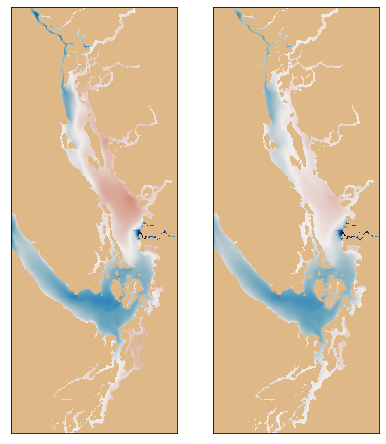

In [41]:

fact = 0.6
fig = plt.figure(figsize=(10*fact, 10.5*fact)) 
fs = 8
ax3 = plt.subplot2grid((1,2), (0,0), colspan=1,rowspan = 2)
tplt = BR_flx_gC_m2_yr
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.balance, vmin=-120, vmax=120)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'burlywood')
#$\bf{a)}$
#ax3.set_title('Annual Air-Sea Flux \n (present-day run)', fontsize = fs)
plt.xticks([])
plt.yticks([])
#cbar = plt.colorbar(mesh)
#cbar.ax.tick_params(labelsize=fs)
#cbar.set_label('g C $m^{-2}$$yr^{-1}$', fontsize = fs)
#ax3.text(0.03, 0.03, 'a)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax5 = plt.subplot2grid((1,2), (0,1), colspan=1,rowspan = 2)
tplt = PI_flx_gC_m2_yr
viz_tools.set_aspect(ax5)
mesh = ax5.pcolormesh(tplt, cmap=cm.balance, vmin=-120, vmax=120)
viz_tools.plot_land_mask(ax5, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'burlywood')
#ax5.set_title('Annual Air-Sea Flux \n (preindustrial run)', fontsize = fs)
plt.xticks([])
plt.yticks([])
#cbar = plt.colorbar(mesh)
#cbar.ax.tick_params(labelsize=fs, rotation = 90)
#cbar.set_label('g C $m^{-2}$$yr^{-1}$', fontsize = fs)
#ax5.text(0.03, 0.03, 'b)', transform=ax5.transAxes, fontsize=16, fontweight='bold', va='bottom')


plt.tight_layout()
#plt.savefig('Fig3_ab.jpg', dpi = 600)

In [42]:
plt.rcParams['font.family']
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
print(font)

/home/tjarniko/conda_envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf


In [43]:
import xarray as xr

#years, months, data
monthly_array_mesozooplankton_depthint_jdfslice = np.zeros([5,12,200,200])

# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(250,450), 'x': slice(0,200)}
e3t, tmask = [mask[var].isel(**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2015, 2020), ['mesozooplankton']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}
# Loop through years
for year in [2015, 2016, 2017, 2018, 2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/results/SalishSea/month-avg.201905/SalishSea_1m_{datestr}_{datestr}'
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_mesozooplankton_depthint_jdfslice[year-2015,month-1,:,:] = q2
            
            for var in ['mesozooplankton']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(slc).values * e3t).sum(axis=1).data)
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
        
        
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]

(5, 12)


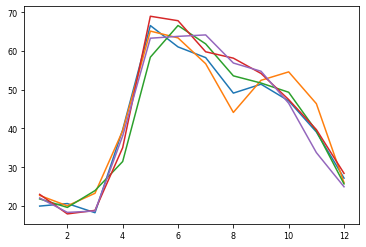

In [44]:
monthly_array_mesozooplankton_depthint_jdfslice[monthly_array_mesozooplankton_depthint_jdfslice == 0 ] = np.nan

monthly_array_mesozooplankton_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_mesozooplankton_depthint_jdfslice, axis = 2),axis = 2) 

print(np.shape(monthly_array_mesozooplankton_depthint_slicemean))

#plot monthly means for 5 years
for i in range(0,5):
    plt.plot(np.arange(1,13,1), monthly_array_mesozooplankton_depthint_slicemean[i,:])

In [45]:
monthly_array_mesozooplankton_depthint_jdfslice[4,5,:,:]

array([[        nan,         nan,         nan, ..., 97.38868727,
        97.70016365, 97.95853391],
       [        nan,         nan,         nan, ..., 96.47457662,
        96.81852657, 97.65912437],
       [        nan,         nan,         nan, ..., 96.3300075 ,
        96.44648383, 96.40562854],
       ...,
       [        nan,  1.15910863,  1.15998299, ...,         nan,
                nan,         nan],
       [        nan,  1.10323775,  1.1039616 , ...,         nan,
                nan,         nan],
       [        nan,  1.08587461,  1.08646161, ...,         nan,
                nan,         nan]])